In [15]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import sklearn.preprocessing
import sklearn.multiclass
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from os.path import expanduser
from sklearn.metrics import classification_report

In [2]:
with open('../merged_data_v3.pkl', 'rb') as myfile:
    df = pickle.load(myfile)

In [3]:
y_temp = df['genre_bin'].apply(lambda x: np.asarray([int(i) for i in list(x)]).reshape((1,-1)))
y = np.concatenate(y_temp, axis = 0)

In [4]:
df.drop(df.columns[55::], axis = 1, inplace = True)
df.drop('merge_genres', axis = 1, inplace = True)

In [5]:
df_ext_list = []
for col in df.columns:
    if df[col].dtypes == object:
        # dummify
        dummy = pd.get_dummies(df[col])
        new_title = [col+'='+s for s in dummy.columns]
        dummy.columns = new_title
        df_ext_list.append(dummy)
    else:
        # standardize
        std = sklearn.preprocessing.scale(df[col])
        std_df = pd.DataFrame(std)
        std_df.columns = [col]
        df_ext_list.append(std_df)
df_ext = pd.concat(df_ext_list, axis = 1)

/Users/hung-yiwu/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)
/Users/hung-yiwu/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype bool was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


In [6]:
X = df_ext.as_matrix()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
model = sklearn.multiclass.OneVsRestClassifier(LogisticRegressionCV())
model.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0),
          n_jobs=1)

In [9]:
model.score(X_test, y_test)

0.16254572700427519

In [10]:
genre_accuracy = []
y_test_predict = model.predict(X_test)
for i in range(y_test_predict.shape[1]):
    genre_accuracy.append(np.mean(y_test_predict[:, i] == y_test[:, i]))

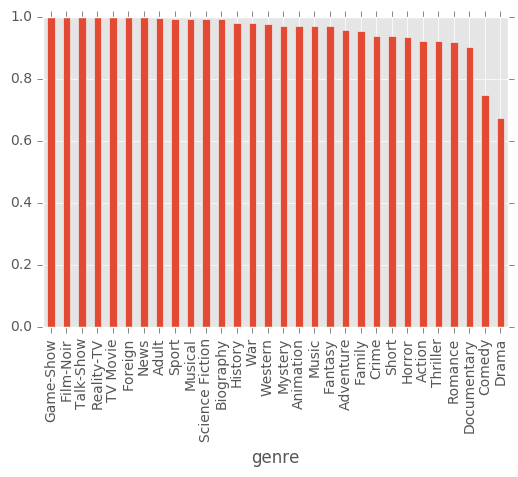

In [11]:
genre_list = ['Action', 'Adult', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Film-Noir', 'Foreign', 'Game-Show', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance',
       'Science Fiction', 'Short', 'Sport', 'TV Movie', 'Talk-Show',
       'Thriller', 'War', 'Western']
genre_accuracy_df = pd.DataFrame()
genre_accuracy_df['genre'] = genre_list
genre_accuracy_df['accuracy'] = genre_accuracy
genre_accuracy_df.sort_values(ascending=False, axis=0, by='accuracy', inplace = True)
genre_accuracy_df.plot.bar(x = 'genre', y = 'accuracy', legend = None)

In [12]:
accuracy = []
for i in range(y_test.shape[0]):
    accuracy.append(np.array_equal(y_test[i, :], y_test_predict[i, :]))

In [13]:
print np.mean(accuracy)

0.162545727004


In [19]:
print classification_report(y_test, model.predict(X_test), target_names = genre_list)

                 precision    recall  f1-score   support

         Action       0.59      0.06      0.10      3543
          Adult       0.87      0.95      0.91       709
      Adventure       0.65      0.01      0.03      1900
      Animation       0.92      0.62      0.74      2951
      Biography       0.00      0.00      0.00       378
         Comedy       0.48      0.03      0.06     11345
          Crime       0.17      0.00      0.00      2758
    Documentary       0.75      0.47      0.58      6354
          Drama       0.60      0.38      0.47     16886
         Family       0.66      0.03      0.06      2166
        Fantasy       0.42      0.00      0.01      1357
      Film-Noir       0.00      0.00      0.00         7
        Foreign       0.00      0.00      0.00        53
      Game-Show       0.00      0.00      0.00         1
        History       0.00      0.00      0.00       839
         Horror       0.50      0.00      0.00      3021
          Music       0.59    